# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  IPython.display import display

# Import Data 
## Power data of all campus buildings of IIT Delhi

In [2]:
df = pd.read_csv('IIT_delhi_energy_dataset/all_buildings_power.csv') 
# The leading r denotes a python raw string. It treats \ as a literal character. 
print('data size: ', df.shape)
display(df.head(3))
df.tail(3)

data size:  (2310568, 10)


,timestamp,Academic,Boys_main,Boys_backup,Facilities,Girls_main,Girls_backup,Lecture,Library,Mess
0,1.376073e+09,28368.60645,28298.05859,11521.14258,NaN,9817.66846,6324.17847,0.0,3972.19702,NaN
1,1.376073e+09,28411.98828,28327.11426,11532.83105,NaN,9804.43408,6348.66260,0.0,3972.83789,NaN
2,1.376073e+09,28752.53809,28343.01562,11538.75635,NaN,9834.51758,6384.14258,0.0,3974.43042,NaN


,timestamp,Academic,Boys_main,Boys_backup,Facilities,Girls_main,Girls_backup,Lecture,Library,Mess
2310565,1.514745e+09,17106.15,29398.30,10431.51,10109.86,7881.402,5000.806,0.0,3303.297,10298.10
2310566,1.514745e+09,18226.03,31212.19,10478.02,10025.47,7851.739,5005.222,0.0,3297.893,10358.44
2310567,1.514745e+09,18173.19,31190.20,10499.17,10104.08,7845.768,5007.380,0.0,3299.532,10365.40


# Clean Data

## Drop less important columns

In [3]:
df.drop(['Boys_backup', 'Girls_backup', 'Lecture'], axis = 1, inplace = True)
display(df.head())
df.shape

,timestamp,Academic,Boys_main,Facilities,Girls_main,Library,Mess
0,1.376073e+09,28368.60645,28298.05859,NaN,9817.66846,3972.19702,NaN
1,1.376073e+09,28411.98828,28327.11426,NaN,9804.43408,3972.83789,NaN
2,1.376073e+09,28752.53809,28343.01562,NaN,9834.51758,3974.43042,NaN
3,1.376073e+09,29031.44629,28447.11719,NaN,9881.32666,3981.96484,NaN
4,1.376073e+09,28487.45801,28393.62207,NaN,9894.75684,3986.44995,NaN


(2310568, 7)

## Check data types of columns and summuray statistics

In [4]:
df.isna().sum()

timestamp          0
Academic       41041
Boys_main     639024
Facilities    261665
Girls_main    657515
Library       596931
Mess          297479
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310568 entries, 0 to 2310567
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   timestamp   float64
 1   Academic    float64
 2   Boys_main   float64
 3   Facilities  float64
 4   Girls_main  float64
 5   Library     float64
 6   Mess        float64
dtypes: float64(7)
memory usage: 123.4 MB


In [6]:
df.describe()

,timestamp,Academic,Boys_main,Facilities,Girls_main,Library,Mess
count,2.310568e+06,2.269527e+06,1.671544e+06,2.048903e+06,1.653053e+06,1.713637e+06,2.013089e+06
mean,1.445394e+09,2.778582e+04,1.748801e+04,1.045892e+04,7.315914e+03,9.074730e+03,2.219535e+04
std,4.002673e+07,1.401836e+04,8.375309e+03,4.673187e+03,2.658483e+03,6.655733e+03,8.822726e+03
min,1.376073e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.324592e+02
25%,1.410732e+09,1.813406e+04,1.151557e+04,8.073814e+03,5.314344e+03,4.483057e+03,1.556387e+04
50%,1.445390e+09,2.334184e+04,1.559360e+04,9.860552e+03,7.079641e+03,6.710730e+03,2.064835e+04
75%,1.480049e+09,3.324996e+04,2.150550e+04,1.230265e+04,8.994355e+03,1.153799e+04,2.734457e+04
max,1.514745e+09,9.578633e+04,9.766386e+04,1.394371e+05,2.089592e+04,9.920895e+04,1.424421e+05


## Convert timestamp to datetime format and change time zone
**`Note from Readme.txt: The timestamp provided is in UNIX format.  While converting timestamps to Human readable format, mention timezone as "Asia/Kolkata" and set offset as +5:30 hours.`**

* **Additional notes:**
    1. Unix time: Number of seconds that have elapsed since 00:00:00 Coordinated Universal Time (UTC), 01-01-1970. 
    2. UNIX timestamps only have UTC timezone
    
We first localise the timezone to UTC and then convert the timezone to Asia/Kolkata

In [7]:
df['timestamp'] = pd.to_datetime(df.timestamp, unit = 's').dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata') 
display(df.head(3))

,timestamp,Academic,Boys_main,Facilities,Girls_main,Library,Mess
0,2013-08-10 00:00:00+05:30,28368.60645,28298.05859,NaN,9817.66846,3972.19702,NaN
1,2013-08-10 00:01:00+05:30,28411.98828,28327.11426,NaN,9804.43408,3972.83789,NaN
2,2013-08-10 00:02:00+05:30,28752.53809,28343.01562,NaN,9834.51758,3974.43042,NaN


# Resample/Transform Data
## Resample from per minute to per day
The power data is recorded for every minute. We resample the data for daily values. This allows for practical forcasting for the next days rather than forecasting for next minutes. We can also choose to resample the data for each hour. For simplicity, we use the daily frequency. 

In [8]:
%%time
df.set_index('timestamp', inplace = True);

# resample data to daily values
df_daily = df.resample('D').sum()  

# check data shape
print('daily data size: ', df_daily.shape)
df_daily.head()

daily data size:  (1605, 6)
CPU times: total: 234 ms
Wall time: 238 ms


,Academic,Boys_main,Facilities,Girls_main,Library,Mess
timestamp,,,,,,
2013-08-10 00:00:00+05:30,5.004221e+07,3.037825e+07,0.0,1.217335e+07,2.097591e+07,0.0
2013-08-11 00:00:00+05:30,2.437140e+07,2.923643e+07,0.0,1.138553e+07,9.284310e+06,0.0
2013-08-12 00:00:00+05:30,5.010114e+07,3.337770e+07,0.0,1.167958e+07,1.662112e+07,0.0
2013-08-13 00:00:00+05:30,5.099030e+07,3.564907e+07,0.0,1.258177e+07,1.735517e+07,0.0
2013-08-14 00:00:00+05:30,4.933641e+07,2.777675e+07,0.0,1.286242e+07,1.558724e+07,0.0


## Convert the power values to MW from Watt
The power data was recorded in Watt. However, after resampling the data from per minute to per day, the power values for each day becomes very high. Hence, converting them to mega-watt (MW) makes more sense. 

In [9]:
# Divide power values by 10^6 to get them in Mega_Watt (MW).
df_daily = df_daily.loc[:]/10**6 

# Change column names to indicate powers are now in MW instead of Watt
df_daily.columns = ['Academic_MW', 'Boys_main_MW', 'Facilities_MW', 'Girls_main_MW', 'Library_MW', 'Mess_MW']
df_daily.head()

,Academic_MW,Boys_main_MW,Facilities_MW,Girls_main_MW,Library_MW,Mess_MW
timestamp,,,,,,
2013-08-10 00:00:00+05:30,50.042213,30.378249,0.0,12.173354,20.975906,0.0
2013-08-11 00:00:00+05:30,24.371400,29.236426,0.0,11.385533,9.284310,0.0
2013-08-12 00:00:00+05:30,50.101136,33.377700,0.0,11.679579,16.621125,0.0
2013-08-13 00:00:00+05:30,50.990300,35.649065,0.0,12.581769,17.355165,0.0
2013-08-14 00:00:00+05:30,49.336414,27.776752,0.0,12.862419,15.587241,0.0


# Save cleaned and transformed data to CSV

In [10]:
# save updated dataset
df_daily.to_csv('IIT_delhi_energy_dataset/all_buildings_power_daily.csv')

# Visualise sample data

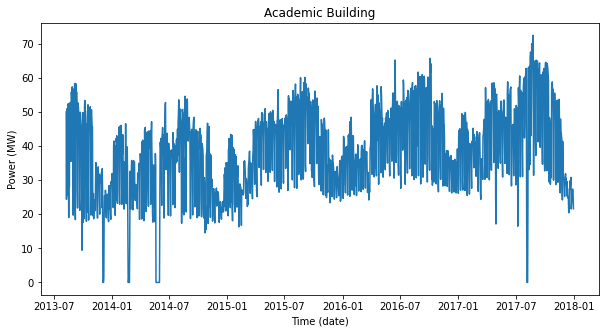

CPU times: total: 344 ms
Wall time: 347 ms


In [11]:
%%time
fig = plt.figure(figsize=(10, 5));
plt.plot(df_daily.index, df_daily.Academic_MW)
plt.xlabel('Time (date)')
plt.ylabel('Power (MW)')
plt.title('Academic Building')
plt.show()

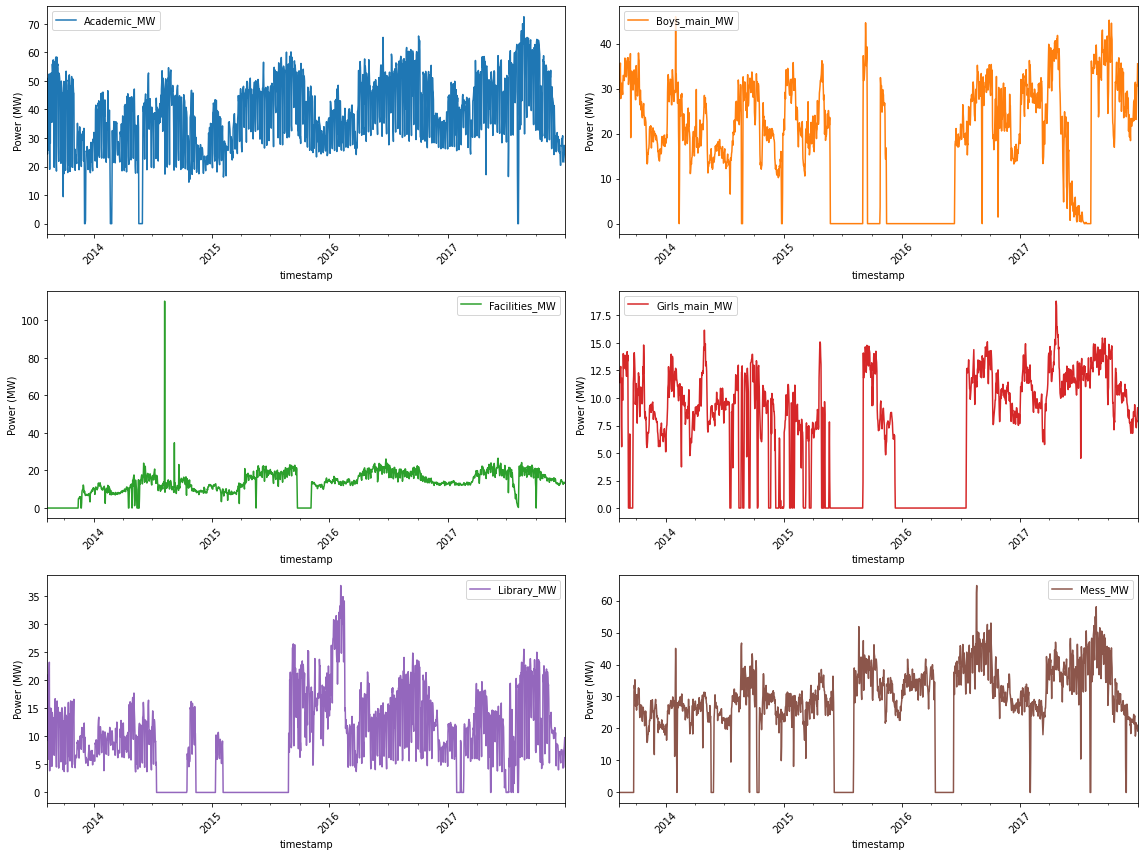

CPU times: total: 1.44 s
Wall time: 1.43 s


In [12]:
%%time
fig, ax = plt.subplots(3, 2, figsize=(16, 12), tight_layout=True);
df_daily.plot(ax=ax, subplots=True, rot=45, ylabel = 'Power (MW)'); # xlabel = 'Date', 
plt.show()